Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

To multiply two matrices:
Matrix A of size (n × k)
Matrix B of size (k × m)

The result is a matrix C of size (n × m). Each entry C[i][j] is calculated as:

$$
C[i][j] = \sum_{r=1}^{k} A[i][r] \cdot B[r][j]
$$

Multiplications:
Each element of the result matrix requires k multiplications.
There are n × m such elements.
Total multiplications = n × m × k

Additions:
Each dot product involves k - 1 additions (adding k numbers requires k - 1 additions).
Total additions = n × m × (k - 1)

Final Answer:
Multiplications = n × m × k,
Additions = n × m × (k - 1)

Q.2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import time
import numpy as np

# Take dimensions as input from the user
n = int(input("Enter number of rows for A (n): "))
k = int(input("Enter number of columns for A / rows for B (k): "))
m = int(input("Enter number of columns for B (m): "))

# Create matrix A (n x k)
A = []
for i in range(n):
    row = []
    for j in range(k):
        row.append(i + j)  
    A.append(row)

# Create matrix B (k x m)
B = []
for i in range(k):
    row = []
    for j in range(m):
        row.append(i - j)  
    B.append(row)

# Multiply matrices using list of lists
def matmul_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    result = []

    for i in range(n):
        row = []
        for j in range(m):
            sum_val = 0
            for l in range(k):
                sum_val += A[i][l] * B[l][j]
            row.append(sum_val)
        result.append(row)

    return result

# Multiply using NumPy
def matmul_numpy(A, B):
    A_np = np.array(A)
    B_np = np.array(B)
    return np.dot(A_np, B_np)

# Time list-of-lists multiplication
start1 = time.time()
res1 = matmul_list(A, B)
end1 = time.time()
time_list = end1 - start1

# Time NumPy multiplication
start2 = time.time()
res2 = matmul_numpy(A, B)
end2 = time.time()
time_numpy = end2 - start2

# Output
print("\nTime using list of lists:", time_list, "seconds")
print("Time using NumPy:", time_numpy, "seconds")

# Comparison
if time_list > time_numpy:
    print("NumPy is faster.")
else:
    print("List-of-lists is faster.")



Time using list of lists: 0.16571760177612305 seconds
Time using NumPy: 0.0014185905456542969 seconds
NumPy is faster.


Why is NumPy faster?
Reason:
NumPy uses highly optimized C code. It performs vectorized operations efficiently. Python loops are slower due to interpreter overhead.

Q.3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Method 1: Repeated Min/Max Finding
To find the k‑th smallest (or largest) element, this method performs k passes through the list.
For median, we need about n/2 passes.

Time Complexity:
O(n²) in the worst case — inefficient.

Method 2: Sorting
Sort the array first, then pick the middle element(s).
Python's sort is Timsort, which is O(n logn).


Method 3: QuickSelect (Efficient Median)
Uses a randomized partitioning scheme.
Average-case time complexity: O(n)
Worst-case: O(n²), but rare.


In [ ]:
import random
import time
import numpy as np

# Generate large random list
n = 50_000
data = [random.randint(0, 1_000_000) for _ in range(n)]
data_np = np.array(data)

# Method 1: Repeated Min-Finding (O(n²))
def find_median_repeated(arr):
    temp = arr[:]  
    half = (len(temp) + 1) // 2
    for _ in range(half):
        min_val = float('inf')
        min_idx = -1
        for i, val in enumerate(temp):
            if val < min_val:
                min_val = val
                min_idx = i
        temp[min_idx] = float('inf')  # remove smallest found
    return min_val if len(arr) % 2 else (
        min_val + min(x for x in temp if x != float('inf'))
    ) / 2

# Method 2: Sorting (O(n log n))
def find_median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    mid = n // 2
    return sorted_arr[mid] if n % 2 else (sorted_arr[mid - 1] + sorted_arr[mid]) / 2

# Method 3: QuickSelect (avg O(n))
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2:
        return quickselect(arr, n // 2)
    else:
        return 0.5 * (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2))

# Timing
def time_function(name, func, arr):
    start = time.perf_counter()
    result = func(arr)
    end = time.perf_counter()
    print(f"{name}: Median = {result} | Time: {end - start:.5f} s")

# Run All
print(f"\nArray size: {n}")
time_function("Method 1 (Repeated Min-Finding)", find_median_repeated, data)  # very slow for large n
time_function("Method 2 (Sorting)", find_median_sort, data)
time_function("Method 3 (QuickSelect)", find_median_quickselect, data)
time_function("NumPy Median", np.median, data_np)



Array size: 50000
Method 1 (Repeated Min-Finding): Median = 497352.5 | Time: 46.02136 s
Method 2 (Sorting): Median = 497352.5 | Time: 0.00608 s
Method 3 (QuickSelect): Median = 497352.5 | Time: 0.02309 s
NumPy Median: Median = 497352.5 | Time: 0.00045 s


Q.4.What is the gradient of the following function with respect to x and y?

The function is:

$$
f(x, y) = x^2 y + y^3 \sin(x)
$$

The gradient of \( f(x, y) \) with respect to \( x \) and \( y \) is:

$$
\nabla f(x, y) = \left[ \frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y} \right]
= \left[ 2xy + y^3 \cos(x),\ x^2 + 3y^2 \sin(x) \right]
$$


Q.5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [3]:
import jax.numpy as jnp
from jax import grad
import numpy as np

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute gradients using JAX
grad_x = grad(f, argnums=0)
grad_y = grad(f, argnums=1)

# Analytical gradient
def grad_f_analytical(x, y):
    dx = 2 * x * y + y**3 * np.cos(x)
    dy = x**2 + 3 * y**2 * np.sin(x)
    return dx, dy

# Test with a few random values
test_vals = [(1.0, 2.0), (0.5, -1.5), (-2.0, 1.2), (3.14, 0.7)]

for x, y in test_vals:
    jax_dx = grad_x(x, y)
    jax_dy = grad_y(x, y)

    ana_dx, ana_dy = grad_f_analytical(x, y)

    print(f"\nFor x = {x}, y = {y}:")
    print(f"JAX     ∂f/∂x = {jax_dx:.6f}, ∂f/∂y = {jax_dy:.6f}")
    print(f"Analytic ∂f/∂x = {ana_dx:.6f}, ∂f/∂y = {ana_dy:.6f}")





For x = 1.0, y = 2.0:
JAX     ∂f/∂x = 8.322418, ∂f/∂y = 11.097651
Analytic ∂f/∂x = 8.322418, ∂f/∂y = 11.097652

For x = 0.5, y = -1.5:
JAX     ∂f/∂x = -4.461841, ∂f/∂y = 3.486122
Analytic ∂f/∂x = -4.461841, ∂f/∂y = 3.486122

For x = -2.0, y = 1.2:
JAX     ∂f/∂x = -5.519102, ∂f/∂y = 0.071835
Analytic ∂f/∂x = -5.519102, ∂f/∂y = 0.071835

For x = 3.14, y = 0.7:
JAX     ∂f/∂x = 4.053000, ∂f/∂y = 9.861941
Analytic ∂f/∂x = 4.053000, ∂f/∂y = 9.861941


Q.6. Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
import sympy as sp


# Define symbols
x, y = sp.symbols('x y')


# Define the function
f = x**2 * y + y**3 * sp.sin(x)


# Compute gradient
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


# Display results
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)


∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


Q.7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [7]:
students = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "A",
                "Marks": {"Maths": 95, "English": 88}
            },
            2: {
                "Name": "B",
                "Marks": {"Maths": 78, "English": 82}
            }
        },
        "Branch 2": {
            3: {
                "Name": "C",
                "Marks": {"Maths": 85, "English": 80}
            }
        }
    },
    2023: {
        "Branch 1": {
            4: {
                "Name": "D",
                "Marks": {"Maths": 92, "English": 91}
            }
        },
        "Branch 2": {
            5: {
                "Name": "E",
                "Marks": {"Maths": 88, "English": 85}
            }
        }
    },
    2024: {
        "Branch 1": {
            6: {
                "Name": "F",
                "Marks": {"Maths": 76, "English": 69}
            }
        },
        "Branch 2": {
            7: {
                "Name": "G",
                "Marks": {"Maths": 90, "English": 95}
            }
        }
    },
    2025: {
        "Branch 1": {
            8: {
                "Name": "H",
                "Marks": {"Maths": 85, "English": 87}
            }
        },
        "Branch 2": {
            9: {
                "Name": "I",
                "Marks": {"Maths": 93, "English": 89}
            }
        }
    }
}

# Printing the data
for year, branches in students.items():
    print(f"Year: {year}")
    for branch, records in branches.items():
        print(f"  {branch}:")
        for roll, info in records.items():
            print(f"    Roll Number: {roll}")
            print(f"      Name: {info['Name']}")
            print(f"      Marks:")
            for subject, mark in info["Marks"].items():
                print(f"        {subject}: {mark}")
    print()

Year: 2022
  Branch 1:
    Roll Number: 1
      Name: A
      Marks:
        Maths: 95
        English: 88
    Roll Number: 2
      Name: B
      Marks:
        Maths: 78
        English: 82
  Branch 2:
    Roll Number: 3
      Name: C
      Marks:
        Maths: 85
        English: 80

Year: 2023
  Branch 1:
    Roll Number: 4
      Name: D
      Marks:
        Maths: 92
        English: 91
  Branch 2:
    Roll Number: 5
      Name: E
      Marks:
        Maths: 88
        English: 85

Year: 2024
  Branch 1:
    Roll Number: 6
      Name: F
      Marks:
        Maths: 76
        English: 69
  Branch 2:
    Roll Number: 7
      Name: G
      Marks:
        Maths: 90
        English: 95

Year: 2025
  Branch 1:
    Roll Number: 8
      Name: H
      Marks:
        Maths: 85
        English: 87
  Branch 2:
    Roll Number: 9
      Name: I
      Marks:
        Maths: 93
        English: 89



Q.8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [8]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  

    def __repr__(self):
        return f"Roll No: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"{self.name}: {self.students}"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"{self.year}: {self.branches}"


class Database:
    def __init__(self):
        self.years = []  # list of Year objects

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database: {self.years}"


# Create the database with sample data
db = Database()

# Year 2022
y2022 = Year(2022)
b1_2022 = Branch("Branch 1")
b1_2022.add_student(Student(1, "A", {"Maths": 95, "English": 88}))
b1_2022.add_student(Student(2, "B", {"Maths": 78, "English": 82}))
b2_2022 = Branch("Branch 2")
b2_2022.add_student(Student(3, "C", {"Maths": 85, "English": 80}))
y2022.add_branch(b1_2022)
y2022.add_branch(b2_2022)
db.add_year(y2022)

# Year 2023
y2023 = Year(2023)
b1_2023 = Branch("Branch 1")
b1_2023.add_student(Student(4, "D", {"Maths": 92, "English": 91}))
b2_2023 = Branch("Branch 2")
b2_2023.add_student(Student(5, "E", {"Maths": 88, "English": 85}))
y2023.add_branch(b1_2023)
y2023.add_branch(b2_2023)
db.add_year(y2023)

# Year 2024
y2024 = Year(2024)
b1_2024 = Branch("Branch 1")
b1_2024.add_student(Student(6, "F", {"Maths": 76, "English": 69}))
b2_2024 = Branch("Branch 2")
b2_2024.add_student(Student(7, "G", {"Maths": 90, "English": 95}))
y2024.add_branch(b1_2024)
y2024.add_branch(b2_2024)
db.add_year(y2024)

# Year 2025
y2025 = Year(2025)
b1_2025 = Branch("Branch 1")
b1_2025.add_student(Student(8, "H", {"Maths": 85, "English": 87}))
b2_2025 = Branch("Branch 2")
b2_2025.add_student(Student(9, "I", {"Maths": 93, "English": 89}))
y2025.add_branch(b1_2025)
y2025.add_branch(b2_2025)
db.add_year(y2025)


# Print function
def print_database(database):
    for year in database.years:
        print(f"Year: {year.year}")
        for branch in year.branches:
            print(f"  {branch.name}:")
            for student in branch.students:
                print(f"    Roll No: {student.roll_number}")
                print(f"      Name: {student.name}")
                print(f"      Marks:")
                for subject, marks in student.marks.items():
                    print(f"        {subject}: {marks}")
        print()

# Print all data
print_database(db)


Year: 2022
  Branch 1:
    Roll No: 1
      Name: A
      Marks:
        Maths: 95
        English: 88
    Roll No: 2
      Name: B
      Marks:
        Maths: 78
        English: 82
  Branch 2:
    Roll No: 3
      Name: C
      Marks:
        Maths: 85
        English: 80

Year: 2023
  Branch 1:
    Roll No: 4
      Name: D
      Marks:
        Maths: 92
        English: 91
  Branch 2:
    Roll No: 5
      Name: E
      Marks:
        Maths: 88
        English: 85

Year: 2024
  Branch 1:
    Roll No: 6
      Name: F
      Marks:
        Maths: 76
        English: 69
  Branch 2:
    Roll No: 7
      Name: G
      Marks:
        Maths: 90
        English: 95

Year: 2025
  Branch 1:
    Roll No: 8
      Name: H
      Marks:
        Maths: 85
        English: 87
  Branch 2:
    Roll No: 9
      Name: I
      Marks:
        Maths: 93
        English: 89



Q.9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

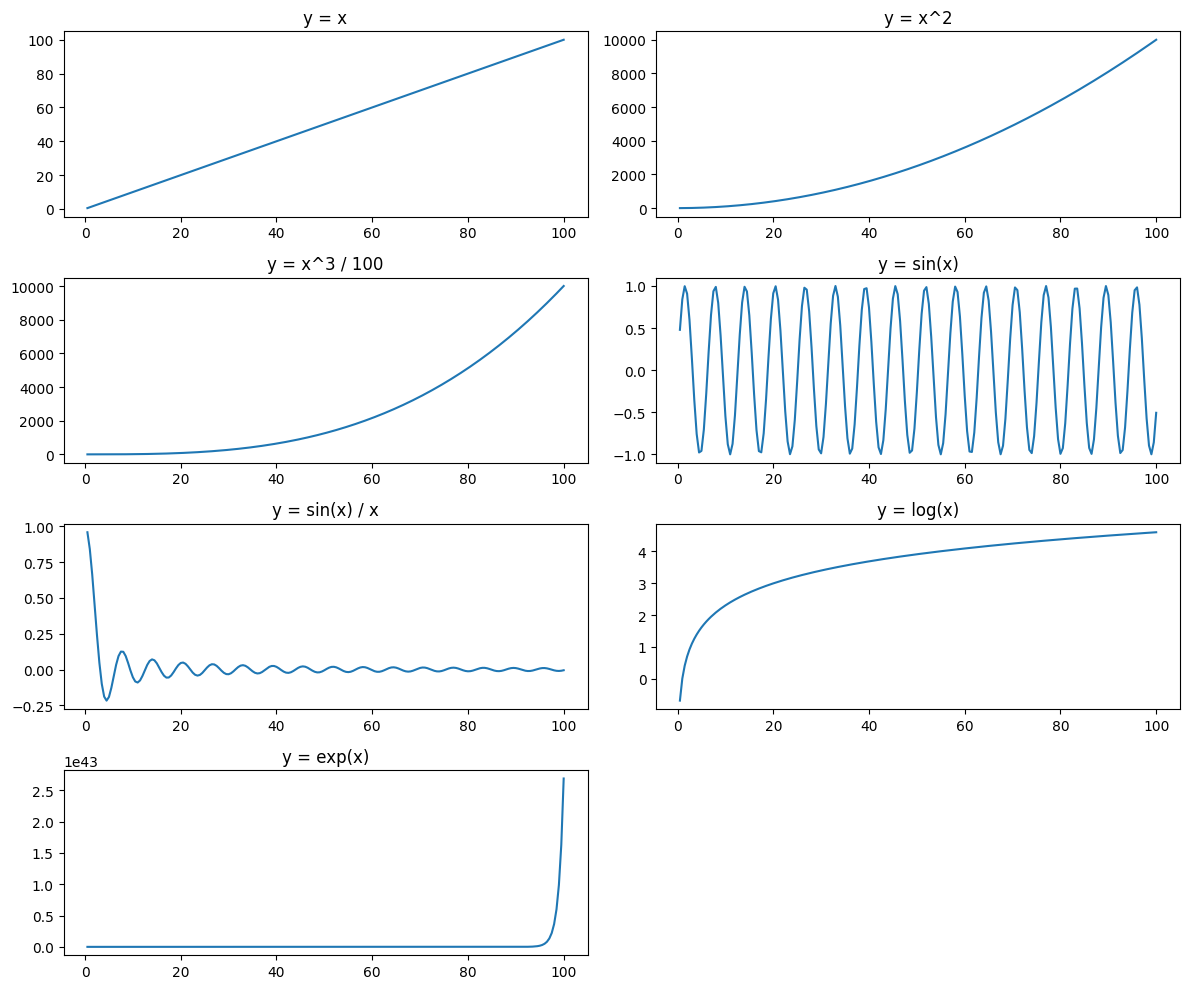

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)  

# Set up the plot
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title('y = x^3 / 100')

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title('y = sin(x) / x')

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(4, 2, 7)
plt.plot(x, y7)
plt.title('y = exp(x)')  

plt.tight_layout()
plt.show()


Q.10. Using numpy generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [21]:
import numpy as np
import pandas as pd

# 1. Generate a 20x5 matrix of random numbers between 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# 2. Create a DataFrame with named columns
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# 3. Find the column with the highest standard deviation
std_devs = df.std()
col_max_std = std_devs.idxmax()
max_std_value = std_devs.max()

# 4. Find the row with the lowest mean
row_means = df.mean(axis=1)
row_min_mean_index = row_means.idxmin()
min_row_mean_value = row_means.min()

# Display results
print("DataFrame:")
print(df)

print(f"\n Column with highest standard deviation: '{col_max_std}' (std = {max_std_value:.4f})")
print(f" Row with lowest mean: Index {row_min_mean_index} (mean = {min_row_mean_value:.4f})")


DataFrame:
           a         b         c         d         e
0   1.271443  1.819968  1.723150  1.302888  1.307940
1   1.556262  1.199050  1.203767  1.600749  1.405654
2   1.724494  1.487509  1.216731  1.692731  1.359781
3   1.844839  1.583597  1.323515  1.399455  1.891246
4   1.464236  1.436735  1.071722  1.670144  1.960912
5   1.715341  1.101812  1.578511  1.154254  1.529817
6   1.349921  1.504317  1.676726  1.770941  1.684268
7   1.910020  1.412715  1.882778  1.125715  1.082295
8   1.686529  1.876778  1.616139  1.613923  1.010205
9   1.316078  1.516020  1.720752  1.112721  1.727966
10  1.202950  1.734261  1.894457  1.278025  1.463173
11  1.527444  1.175883  1.011502  1.760386  1.967547
12  1.712148  1.720607  1.245198  1.728827  1.419191
13  1.685268  1.403770  1.848849  1.972371  1.547704
14  1.891729  1.162432  1.350448  1.990867  1.857012
15  1.528860  1.837166  1.045874  1.042987  1.878879
16  1.863445  1.054312  1.100786  1.888058  1.507704
17  1.318832  1.878528  1.905067  1

Q.11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [23]:
# 5. Add new column 'f' which is the sum of columns a to e
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

# 6. Add column 'g': "LT8" if 'f' < 8, else "GT8"
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

# 7. Count rows where g == "LT8"
lt8_count = (df["g"] == "LT8").sum()

# 8. Standard deviation of column 'f' for LT8 and GT8 rows
std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

# Display results
print(f" Number of rows where 'g' == 'LT8': {lt8_count}")
print(f" Std. Dev of 'f' where 'g' == 'LT8': {std_lt8:.4f}")
print(f" Std. Dev of 'f' where 'g' == 'GT8': {std_gt8:.4f}")


 Number of rows where 'g' == 'LT8': 16
 Std. Dev of 'f' where 'g' == 'LT8': 0.2727
 Std. Dev of 'f' where 'g' == 'GT8': 0.1777


Q.12. Write a small piece of code to explain broadcasting in numpy.

In [24]:
import numpy as np

# A 2D array (3x3)
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# A 1D array
b = np.array([10, 20, 30])

# Broadcasting: b is automatically added to each row of A
result = A + b

print("Original 2D array A:\n", A)
print("1D array b:\n", b)
print("Result after broadcasting:\n", result)


Original 2D array A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
1D array b:
 [10 20 30]
Result after broadcasting:
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


What Happened?

The 1D array b (shape (3,)) was broadcast to match the shape of A (shape (3, 3)).
NumPy automatically stretched b across rows to do element-wise addition.

Q.13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [25]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index


 Example & Verification:

In [26]:
# Sample array
arr = np.array([5, 2, 9, 1, 6])

# Using custom function
custom_result = my_argmin(arr)

# Using NumPy's built-in function
numpy_result = np.argmin(arr)

print("Custom argmin:", custom_result)
print("NumPy argmin: ", numpy_result)


Custom argmin: 3
NumPy argmin:  3
